In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker ## to adjust spacing between ticks
import numpy as np

# read the data
# MAP
map_df = pd.read_csv('MAP_fractions.csv')
# WHO GHO
who_df = pd.read_csv('who_microscopy_rdt_among_suspects_w_null.csv')

In [2]:
map_df.head()

,countryIso3,country,year,frac_sought_public,frac_sought_private,frac_sought_public_tested,frac_sought_public_untested,frac_sought_private_tested,frac_sought_private_untested,frac_sought_public_tested_pos,...,frac_sought_private_tested_neg_treated,frac_sought_private_tested_neg_untreated,frac_sought_private_untested_pos_treated,frac_sought_private_untested_pos_untreated,frac_sought_private_untested_neg_treated,frac_sought_private_untested_neg_untreated,frac_rdt_public,frac_rdt_private,frac_act_public,frac_act_private
0,AFG,Afghanistan,2010,0.592148,0.407852,0.009023,0.990977,0.003314,0.996686,0.0,...,0.186371,0.813629,NaN,NaN,0.076925,0.923075,0.055126,0.055126,0.038758,0.064359
1,AFG,Afghanistan,2011,0.610586,0.389414,0.013824,0.986176,0.004306,0.995694,0.0,...,0.185303,0.814697,NaN,NaN,0.084170,0.915830,0.073464,0.073464,0.053400,0.080347
2,AFG,Afghanistan,2012,0.577596,0.422404,0.017903,0.982097,0.004807,0.995193,0.0,...,0.182111,0.817889,NaN,NaN,0.087526,0.912474,0.097276,0.097276,0.070323,0.094967
3,AFG,Afghanistan,2013,0.579660,0.420340,0.024376,0.975624,0.005753,0.994247,0.0,...,0.176977,0.823023,NaN,NaN,0.095258,0.904742,0.127741,0.127741,0.102431,0.131348
4,AFG,Afghanistan,2014,0.571423,0.428577,0.031854,0.968146,0.006710,0.993290,0.0,...,0.181318,0.818682,NaN,NaN,0.106508,0.893492,0.165993,0.165993,0.125987,0.152229


In [3]:
who_df.head()

,iso2,iso3,country,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,pos_total,frac_rdt_among_tests,micro_pos_frac,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac
0,AF,AFG,Afghanistan,2010,524523.0,69397.0,17592.0,401.0,865181.0,542115.0,69798.0,0.032451,0.132305,0.022794,0.626591,0.128751,0.080674
1,AF,AFG,Afghanistan,2011,531053.0,77549.0,0.0,0.0,936252.0,531053.0,77549.0,0.000000,0.146029,NaN,0.567212,0.146029,0.082829
2,AF,AFG,Afghanistan,2012,511408.0,54840.0,0.0,0.0,847933.0,511408.0,54840.0,0.000000,0.107233,NaN,0.603123,0.107233,0.064675
3,AF,AFG,Afghanistan,2013,507145.0,46114.0,36833.0,6851.0,817606.0,543978.0,52965.0,0.067710,0.090929,0.186002,0.665330,0.097366,0.064781
4,AF,AFG,Afghanistan,2014,514466.0,83920.0,155919.0,22558.0,881515.0,670385.0,106478.0,0.232581,0.163121,0.144678,0.760492,0.158831,0.120790


In [4]:
map_df.columns

Index(['countryIso3', 'country', 'year', 'frac_sought_public',
       'frac_sought_private', 'frac_sought_public_tested',
       'frac_sought_public_untested', 'frac_sought_private_tested',
       'frac_sought_private_untested', 'frac_sought_public_tested_pos',
       'frac_sought_public_tested_neg', 'frac_sought_public_untested_pos',
       'frac_sought_public_untested_neg', 'frac_sought_private_tested_pos',
       'frac_sought_private_tested_neg', 'frac_sought_private_untested_pos',
       'frac_sought_private_untested_neg',
       'frac_sought_public_tested_pos_treated',
       'frac_sought_public_tested_pos_untreated',
       'frac_sought_public_tested_neg_treated',
       'frac_sought_public_tested_neg_untreated',
       'frac_sought_public_untested_pos_treated',
       'frac_sought_public_untested_pos_untreated',
       'frac_sought_public_untested_neg_treated',
       'frac_sought_public_untested_neg_untreated',
       'frac_sought_private_tested_pos_treated',
       'frac_sough

In [46]:
map_df['frac_rdt_total'] = (map_df.frac_rdt_public + map_df.frac_rdt_private) / 2.0
who_df['rdt_among_suspects'] = who_df['rdt_total'] / who_df['suspected']

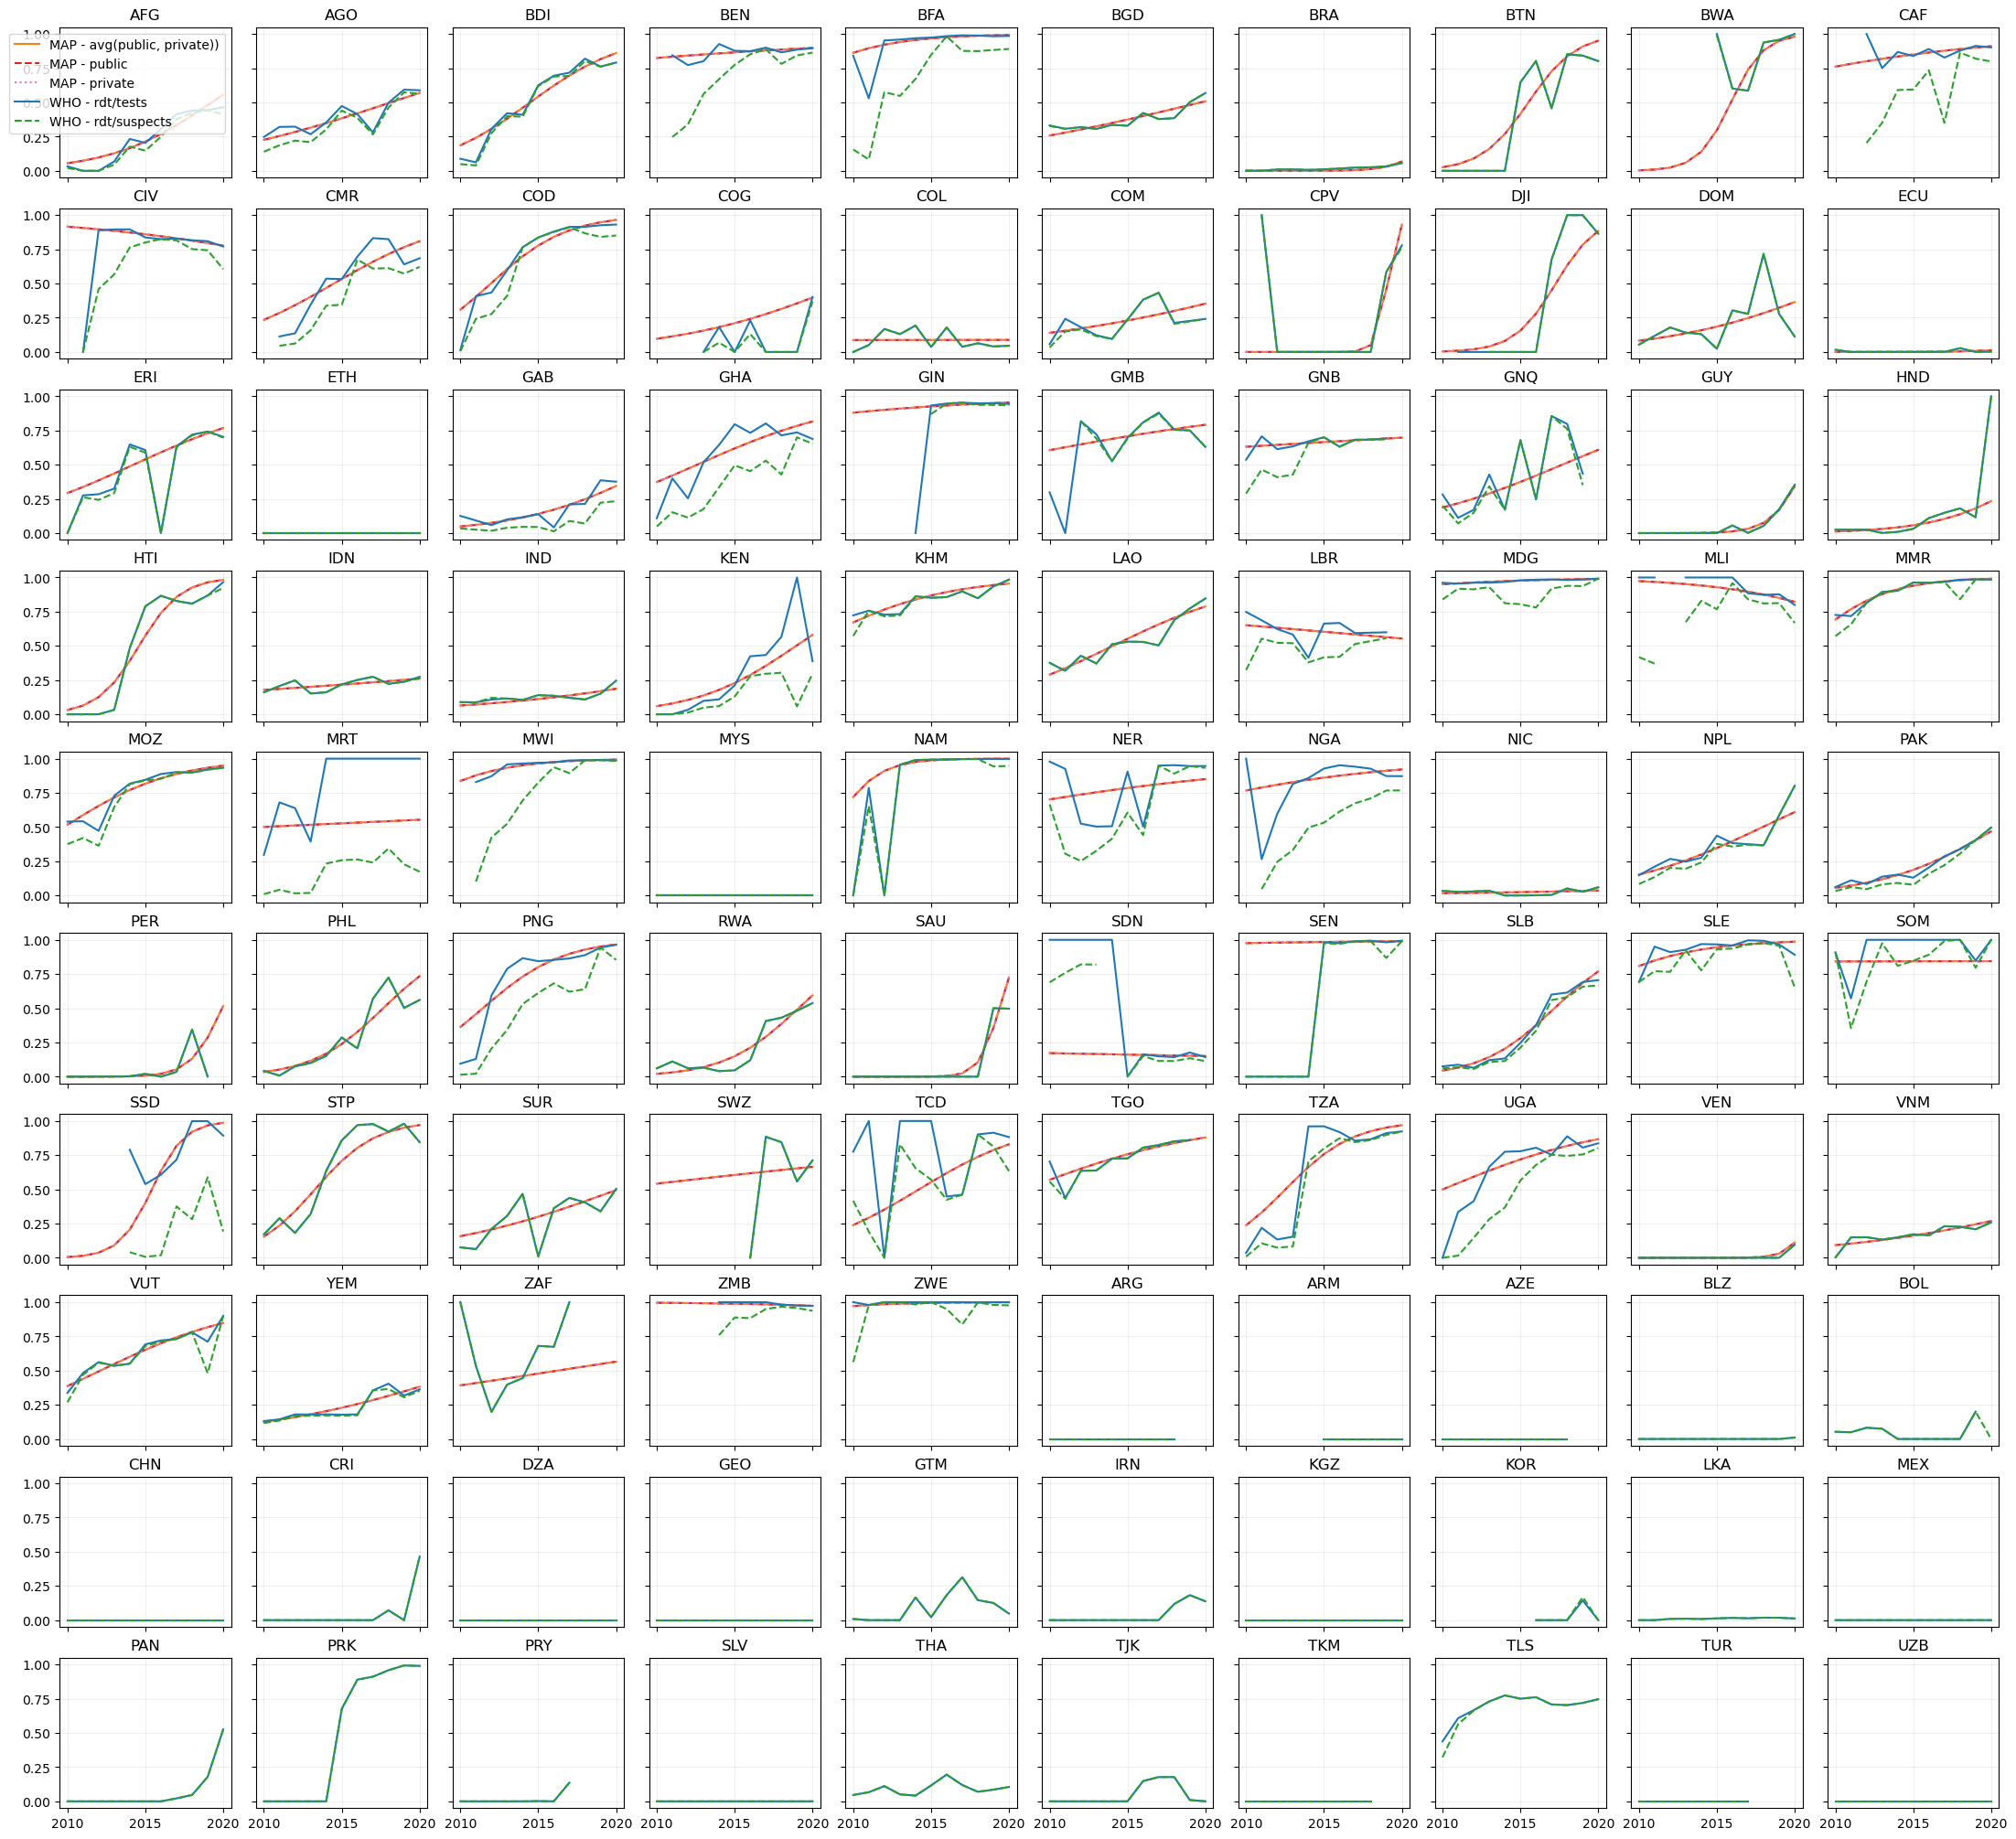

In [6]:
# check to see if who_df.frac_rdt_among_tests is the same as map_df.frac_rdt_total

# group by country (who_df.iso3, map_df.countryIso3)
# plot the two fractions against each other over years

# get the country code as the union of map_df.countryIso3 and who_df.iso3, unique values only
country_codes = pd.concat([map_df.countryIso3, who_df.iso3]).unique()

# create a figure with subplots for each country
# ncols = 10, nrows is determined by the number of countries
ncols = 10
nrows = int(np.ceil(len(country_codes) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22, 20), sharex=True, sharey=True, constrained_layout=True)

# loop over the country codes
for i, country_code in enumerate(country_codes):
    # get the axes for this country
    ax = axes.flat[i]
    # get the data for this country
    map_data = map_df[map_df.countryIso3 == country_code]
    who_data = who_df[who_df.iso3 == country_code]
    # plot the data
    ax.plot(map_data.year, map_data.frac_rdt_total, color='tab:orange', ls='-', label='MAP - avg(public, private))')
    ax.plot(map_data.year, map_data.frac_rdt_public, color='tab:red', ls='--', label='MAP - public')
    ax.plot(map_data.year, map_data.frac_rdt_private, color='tab:pink', ls=':', label='MAP - private')
    ax.plot(who_data.year, who_data.frac_rdt_among_tests, color='tab:blue', label='WHO - rdt/tests')
    ax.plot(who_data.year, who_data.rdt_among_suspects, color='tab:green', ls='--', label='WHO - rdt/suspects')
    # set the title
    ax.set_title(country_code)
    # set the legend
    # ax.legend()
    ax.grid(alpha=0.2)
axes[0,0].legend()

In [47]:
# in who_df:
# if tests_total > sum(micro_total, rdt_total), then rdt_total = tests_total - sum(micro_total, rdt_total)
# if tests_total < sum(micro_total, rdt_total), then rdt_total = 0
# if tests_total == sum(micro_total, rdt_total), then rdt_total = tests_total - micro_total

who_df['rdt_total_notnull'] = None
who_df['rdt_total_notnull'] = np.where(who_df.tests_total > who_df.micro_total + who_df.rdt_total, who_df.tests_total - who_df.micro_total, who_df.rdt_total)
who_df['rdt_total_notnull'] = np.where(who_df.tests_total < who_df.micro_total + who_df.rdt_total, 0, who_df.rdt_total)
who_df['rdt_total_notnull'] = np.where(who_df.tests_total == who_df.micro_total + who_df.rdt_total, who_df.tests_total - who_df.micro_total, who_df.rdt_total)

# if both micro_total and rdt_total are null, then rdt_total_notnull = np.nan
who_df['rdt_total_notnull'] = np.where(who_df.micro_total.isnull() & who_df.rdt_total.isnull(), np.nan, who_df.rdt_total_notnull)

who_df.head()


,iso2,iso3,country,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,pos_total,frac_rdt_among_tests,micro_pos_frac,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac,rdt_among_suspects,rdt_total_notnull
0,AF,AFG,Afghanistan,2010,524523.0,69397.0,17592.0,401.0,865181.0,542115.0,69798.0,0.032451,0.132305,0.022794,0.626591,0.128751,0.080674,0.020333,17592.0
1,AF,AFG,Afghanistan,2011,531053.0,77549.0,0.0,0.0,936252.0,531053.0,77549.0,0.000000,0.146029,NaN,0.567212,0.146029,0.082829,0.000000,0.0
2,AF,AFG,Afghanistan,2012,511408.0,54840.0,0.0,0.0,847933.0,511408.0,54840.0,0.000000,0.107233,NaN,0.603123,0.107233,0.064675,0.000000,0.0
3,AF,AFG,Afghanistan,2013,507145.0,46114.0,36833.0,6851.0,817606.0,543978.0,52965.0,0.067710,0.090929,0.186002,0.665330,0.097366,0.064781,0.045050,36833.0
4,AF,AFG,Afghanistan,2014,514466.0,83920.0,155919.0,22558.0,881515.0,670385.0,106478.0,0.232581,0.163121,0.144678,0.760492,0.158831,0.120790,0.176876,155919.0


In [48]:
who_df['rdt_among_tests_nn'] = who_df['rdt_total_notnull'] / who_df['tests_total']
who_df['rdt_among_suspects_nn'] = who_df['rdt_total_notnull'] / who_df['suspected']

who_df['micro_among_tests'] = who_df['micro_total'] / who_df['tests_total']
who_df['micro_among_suspects'] = who_df['micro_total'] / who_df['suspected']

# where rdt_among_tests_nn is 0 but micro_among_tests is not 0, set rdt_among_tests_nn to 1 - micro_among_tests
who_df['rdt_among_tests_nn'] = np.where((who_df.rdt_among_tests_nn == 0) & (who_df.micro_among_tests != 0), 1 - who_df.micro_among_tests, who_df.rdt_among_tests_nn)
# where rdt_among_suspects_nn is 0 but micro_among_suspects is not 0, set rdt_among_suspects_nn to 1 - micro_among_suspects
who_df['rdt_among_suspects_nn'] = np.where((who_df.rdt_among_suspects_nn == 0) & (who_df.micro_among_suspects != 0), 1 - who_df.micro_among_suspects, who_df.rdt_among_suspects_nn)

In [9]:
'ETH' in who_df.iso3.values

True

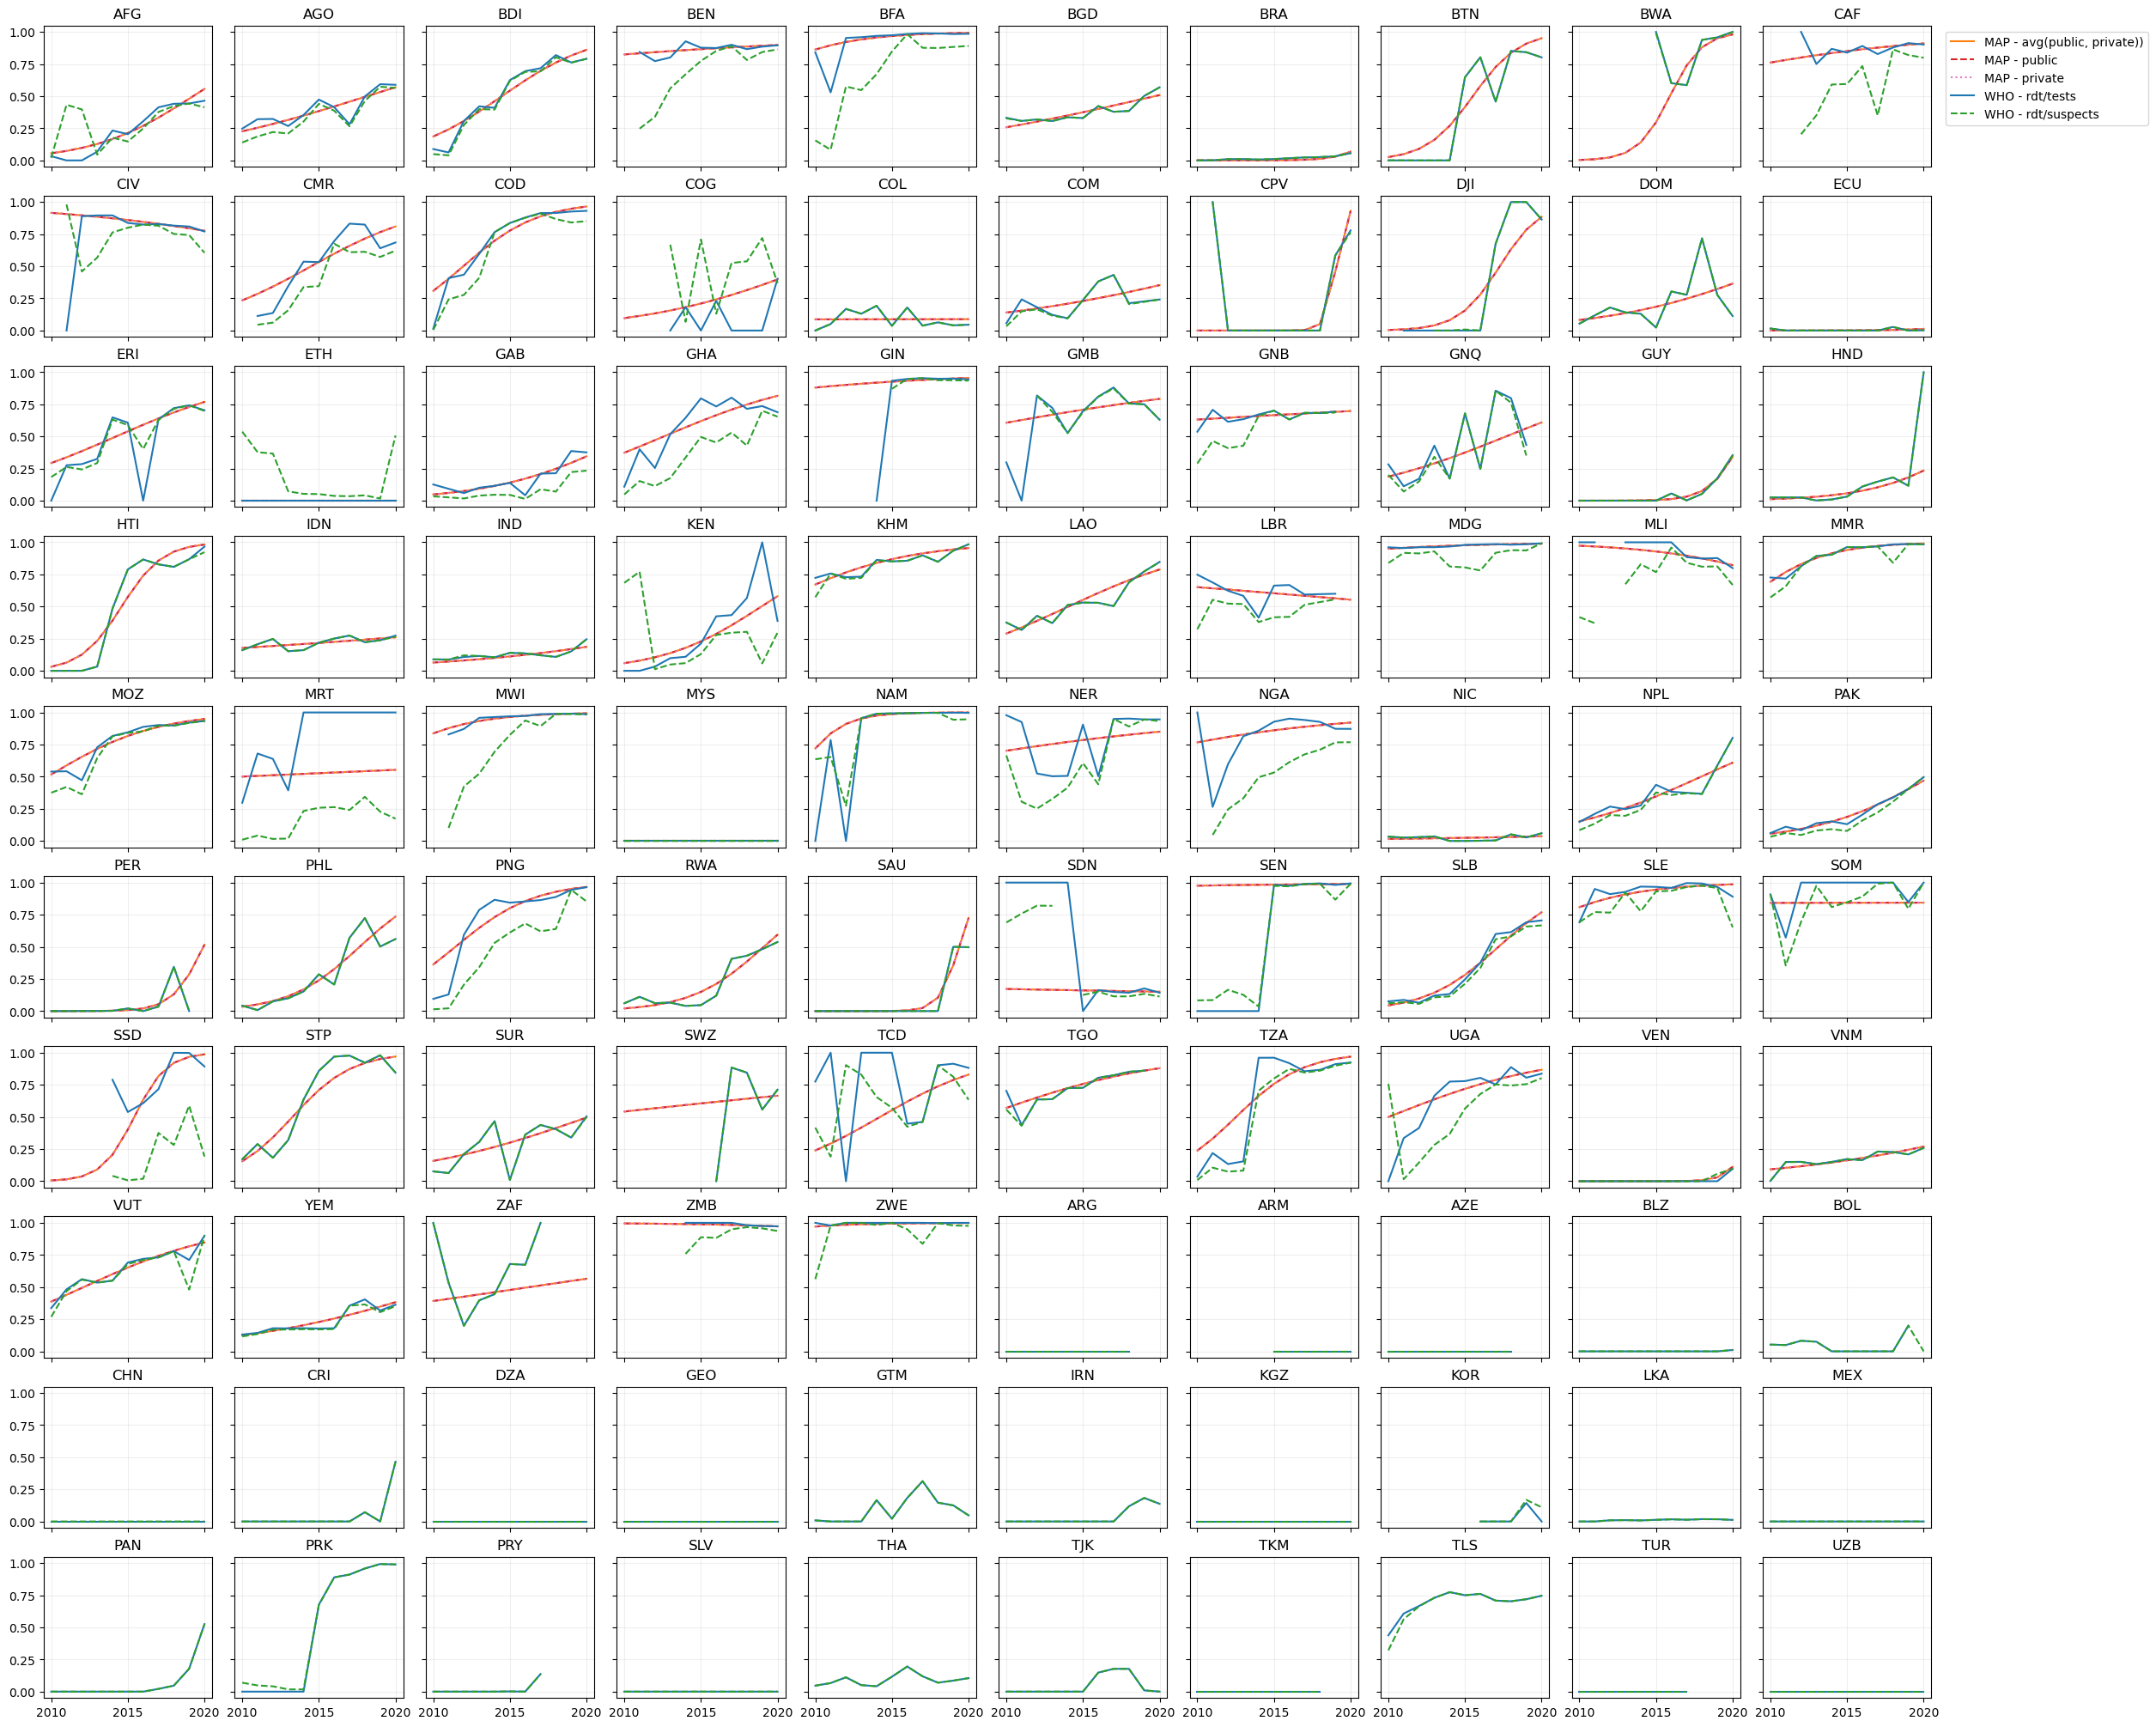

In [10]:
# check to see if who_df.frac_rdt_among_tests is the same as map_df.frac_rdt_total

# group by country (who_df.iso3, map_df.countryIso3)
# plot the two fractions against each other over years

# get the country code as the union of map_df.countryIso3 and who_df.iso3, unique values only
country_codes = pd.concat([map_df.countryIso3, who_df.iso3]).unique()

# create a figure with subplots for each country
# ncols = 10, nrows is determined by the number of countries
ncols = 10
nrows = int(np.ceil(len(country_codes) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20), sharex=True, sharey=True, constrained_layout=True)

# loop over the country codes
for i, country_code in enumerate(country_codes):
    # get the axes for this country
    ax = axes.flat[i]
    # get the data for this country
    map_data = map_df[map_df.countryIso3 == country_code]
    who_data = who_df[who_df.iso3 == country_code]
    # plot the data
    ax.plot(map_data.year, map_data.frac_rdt_total, color='tab:orange', ls='-', label='MAP - avg(public, private))')
    ax.plot(map_data.year, map_data.frac_rdt_public, color='tab:red', ls='--', label='MAP - public')
    ax.plot(map_data.year, map_data.frac_rdt_private, color='tab:pink', ls=':', label='MAP - private')
    ax.plot(who_data.year, who_data.rdt_among_tests_nn, color='tab:blue', label='WHO - rdt/tests')
    ax.plot(who_data.year, who_data.rdt_among_suspects_nn, color='tab:green', ls='--', label='WHO - rdt/suspects')
    # set the title
    ax.set_title(country_code)
    # set the legend
    # ax.legend()
    ax.grid(alpha=0.2)

axes[0,-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left')

In [11]:
who_df.columns

Index(['iso2', 'iso3', 'country', 'year', 'micro_total', 'micro_pos',
       'rdt_total', 'rdt_pos', 'suspected', 'tests_total', 'pos_total',
       'frac_rdt_among_tests', 'micro_pos_frac', 'rdt_pos_frac', 'tests_frac',
       'tests_pos_frac', 'suspected_pos_frac', 'rdt_among_suspects',
       'rdt_total_notnull', 'rdt_among_tests_nn', 'rdt_among_suspects_nn',
       'micro_among_tests', 'micro_among_suspects'],
      dtype='object')

### 3-year rolling average

In [49]:
# new dataframe with 3-year rolling averages in columns
who_df_3yr = who_df.groupby(['iso2','iso3','country']).rolling(3, on='year').mean().reset_index()
who_df_3yr.head()

,iso2,iso3,country,level_3,year,frac_rdt_among_tests,micro_among_suspects,micro_among_tests,micro_pos,micro_pos_frac,...,rdt_among_tests_nn,rdt_pos,rdt_pos_frac,rdt_total,rdt_total_notnull,suspected,suspected_pos_frac,tests_frac,tests_pos_frac,tests_total
0,AF,AFG,Afghanistan,0,2010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AF,AFG,Afghanistan,1,2011,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AF,AFG,Afghanistan,2,2012,0.010817,0.592198,0.989183,67262.000000,0.128522,...,0.010817,133.666667,NaN,5864.000000,5864.000000,883122.000000,0.076060,0.598975,0.127338,528192.0
3,AF,AFG,Afghanistan,3,2013,0.022570,0.596872,0.977430,59501.000000,0.114730,...,0.022570,2283.666667,NaN,12277.666667,12277.666667,867263.666667,0.070762,0.611888,0.116876,528813.0
4,AF,AFG,Afghanistan,4,2014,0.100097,0.602340,0.899903,61624.666667,0.120428,...,0.100097,9803.000000,NaN,64250.666667,64250.666667,849018.000000,0.083415,0.676315,0.121144,575257.0


In [13]:
who_df_3yr.tail(15)

,iso2,iso3,country,level_3,year,frac_rdt_among_tests,micro_among_suspects,micro_among_tests,micro_pos,micro_pos_frac,...,rdt_among_tests_nn,rdt_pos,rdt_pos_frac,rdt_total,rdt_total_notnull,suspected,suspected_pos_frac,tests_frac,tests_pos_frac,tests_total
1044,ZM,ZMB,Zambia,1055,2017,1.000000,0.000000,0.000000,0.000000,NaN,...,1.000000,4.847206e+06,0.560121,8.704591e+06,8.704591e+06,9.565716e+06,0.507373,0.906997,0.560121,8.704591e+06
1045,ZM,ZMB,Zambia,1056,2018,0.993916,0.005990,0.006084,16618.333333,NaN,...,0.993916,5.115594e+06,0.537730,9.541646e+06,9.541646e+06,1.021186e+07,0.502589,0.939172,0.536285,9.601878e+06
1046,ZM,ZMB,Zambia,1057,2019,0.985668,0.014083,0.014332,42776.333333,NaN,...,0.985668,5.188113e+06,0.503241,1.032479e+07,1.032479e+07,1.078271e+07,0.485926,0.971866,0.500294,1.047680e+07
1047,ZM,ZMB,Zambia,1058,2020,0.976767,0.022651,0.023233,85540.000000,0.29437,...,0.976767,6.017208e+06,0.510414,1.169471e+07,1.169471e+07,1.229568e+07,0.493110,0.976096,0.505432,1.197945e+07
1048,ZW,ZWE,Zimbabwe,1059,2010,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1049,ZW,ZWE,Zimbabwe,1060,2011,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1050,ZW,ZWE,Zimbabwe,1061,2012,0.993053,0.006947,0.006947,83126.333333,NaN,...,0.993053,2.820923e+05,0.515889,5.700710e+05,5.700710e+05,7.066010e+05,0.531302,0.854051,0.673190,5.734057e+05
1051,ZW,ZWE,Zimbabwe,1062,2013,0.993053,0.006947,0.006947,0.000000,NaN,...,0.993053,3.398437e+05,0.480207,7.707287e+05,7.707287e+05,7.740633e+05,0.475478,1.000000,0.475478,7.740633e+05
1052,ZW,ZWE,Zimbabwe,1063,2014,1.000000,0.000000,0.000000,0.000000,NaN,...,1.000000,4.159573e+05,0.379026,1.098623e+06,1.098623e+06,1.106845e+06,0.376929,0.994438,0.379026,1.098623e+06
1053,ZW,ZWE,Zimbabwe,1064,2015,1.000000,0.000000,0.000000,0.000000,NaN,...,1.000000,4.844293e+05,0.350206,1.402377e+06,1.402377e+06,1.410600e+06,0.348108,0.994438,0.350206,1.402377e+06


In [14]:
who_df.tail(15)

,iso2,iso3,country,year,micro_total,micro_pos,rdt_total,rdt_pos,suspected,tests_total,...,rdt_pos_frac,tests_frac,tests_pos_frac,suspected_pos_frac,rdt_among_suspects,rdt_total_notnull,rdt_among_tests_nn,rdt_among_suspects_nn,micro_among_tests,micro_among_suspects
1055,ZM,ZMB,Zambia,2017,0.0,0.0,10403283.0,5505639.0,10952323.0,10403283.0,...,0.529221,0.949870,0.529221,0.502691,0.949870,10403283.0,1.000000,0.949870,0.000000,0.000000
1056,ZM,ZMB,Zambia,2018,180697.0,49855.0,9718666.0,4989824.0,10055407.0,9899363.0,...,0.513427,0.984482,0.509091,0.501191,0.966511,9718666.0,0.981747,0.966511,0.018253,0.017970
1057,ZM,ZMB,Zambia,2019,275323.0,78474.0,10852416.0,5068876.0,11340409.0,11127739.0,...,0.467074,0.981247,0.462569,0.453895,0.956969,10852416.0,0.975258,0.956969,0.024742,0.024278
1058,ZM,ZMB,Zambia,2020,398195.0,128291.0,14513049.0,7992924.0,15491235.0,14911244.0,...,0.550741,0.962560,0.544637,0.524246,0.936856,14513049.0,0.973296,0.936856,0.026704,0.025705
1059,ZW,ZWE,Zimbabwe,2010,0.0,249379.0,513032.0,249379.0,912618.0,513032.0,...,0.486089,0.562154,0.972177,0.546513,0.562154,513032.0,1.000000,0.562154,0.000000,0.000000
1060,ZW,ZWE,Zimbabwe,2011,10004.0,0.0,470007.0,319935.0,480011.0,480011.0,...,0.680703,1.000000,0.666516,0.666516,0.979159,470007.0,0.979159,0.979159,0.020841,0.020841
1061,ZW,ZWE,Zimbabwe,2012,0.0,0.0,727174.0,276963.0,727174.0,727174.0,...,0.380876,1.000000,0.380876,0.380876,1.000000,727174.0,1.000000,1.000000,0.000000,0.000000
1062,ZW,ZWE,Zimbabwe,2013,0.0,0.0,1115005.0,422633.0,1115005.0,1115005.0,...,0.379041,1.000000,0.379041,0.379041,1.000000,1115005.0,1.000000,1.000000,0.000000,0.000000
1063,ZW,ZWE,Zimbabwe,2014,0.0,0.0,1453689.0,548276.0,1478357.0,1453689.0,...,0.377162,0.983314,0.377162,0.370868,0.983314,1453689.0,1.000000,0.983314,0.000000,0.000000
1064,ZW,ZWE,Zimbabwe,2015,0.0,0.0,1638438.0,482379.0,1638438.0,1638438.0,...,0.294414,1.000000,0.294414,0.294414,1.000000,1638438.0,1.000000,1.000000,0.000000,0.000000


Text(0.5, 0.98, 'WHO vs MAP - 3-year rolling average')

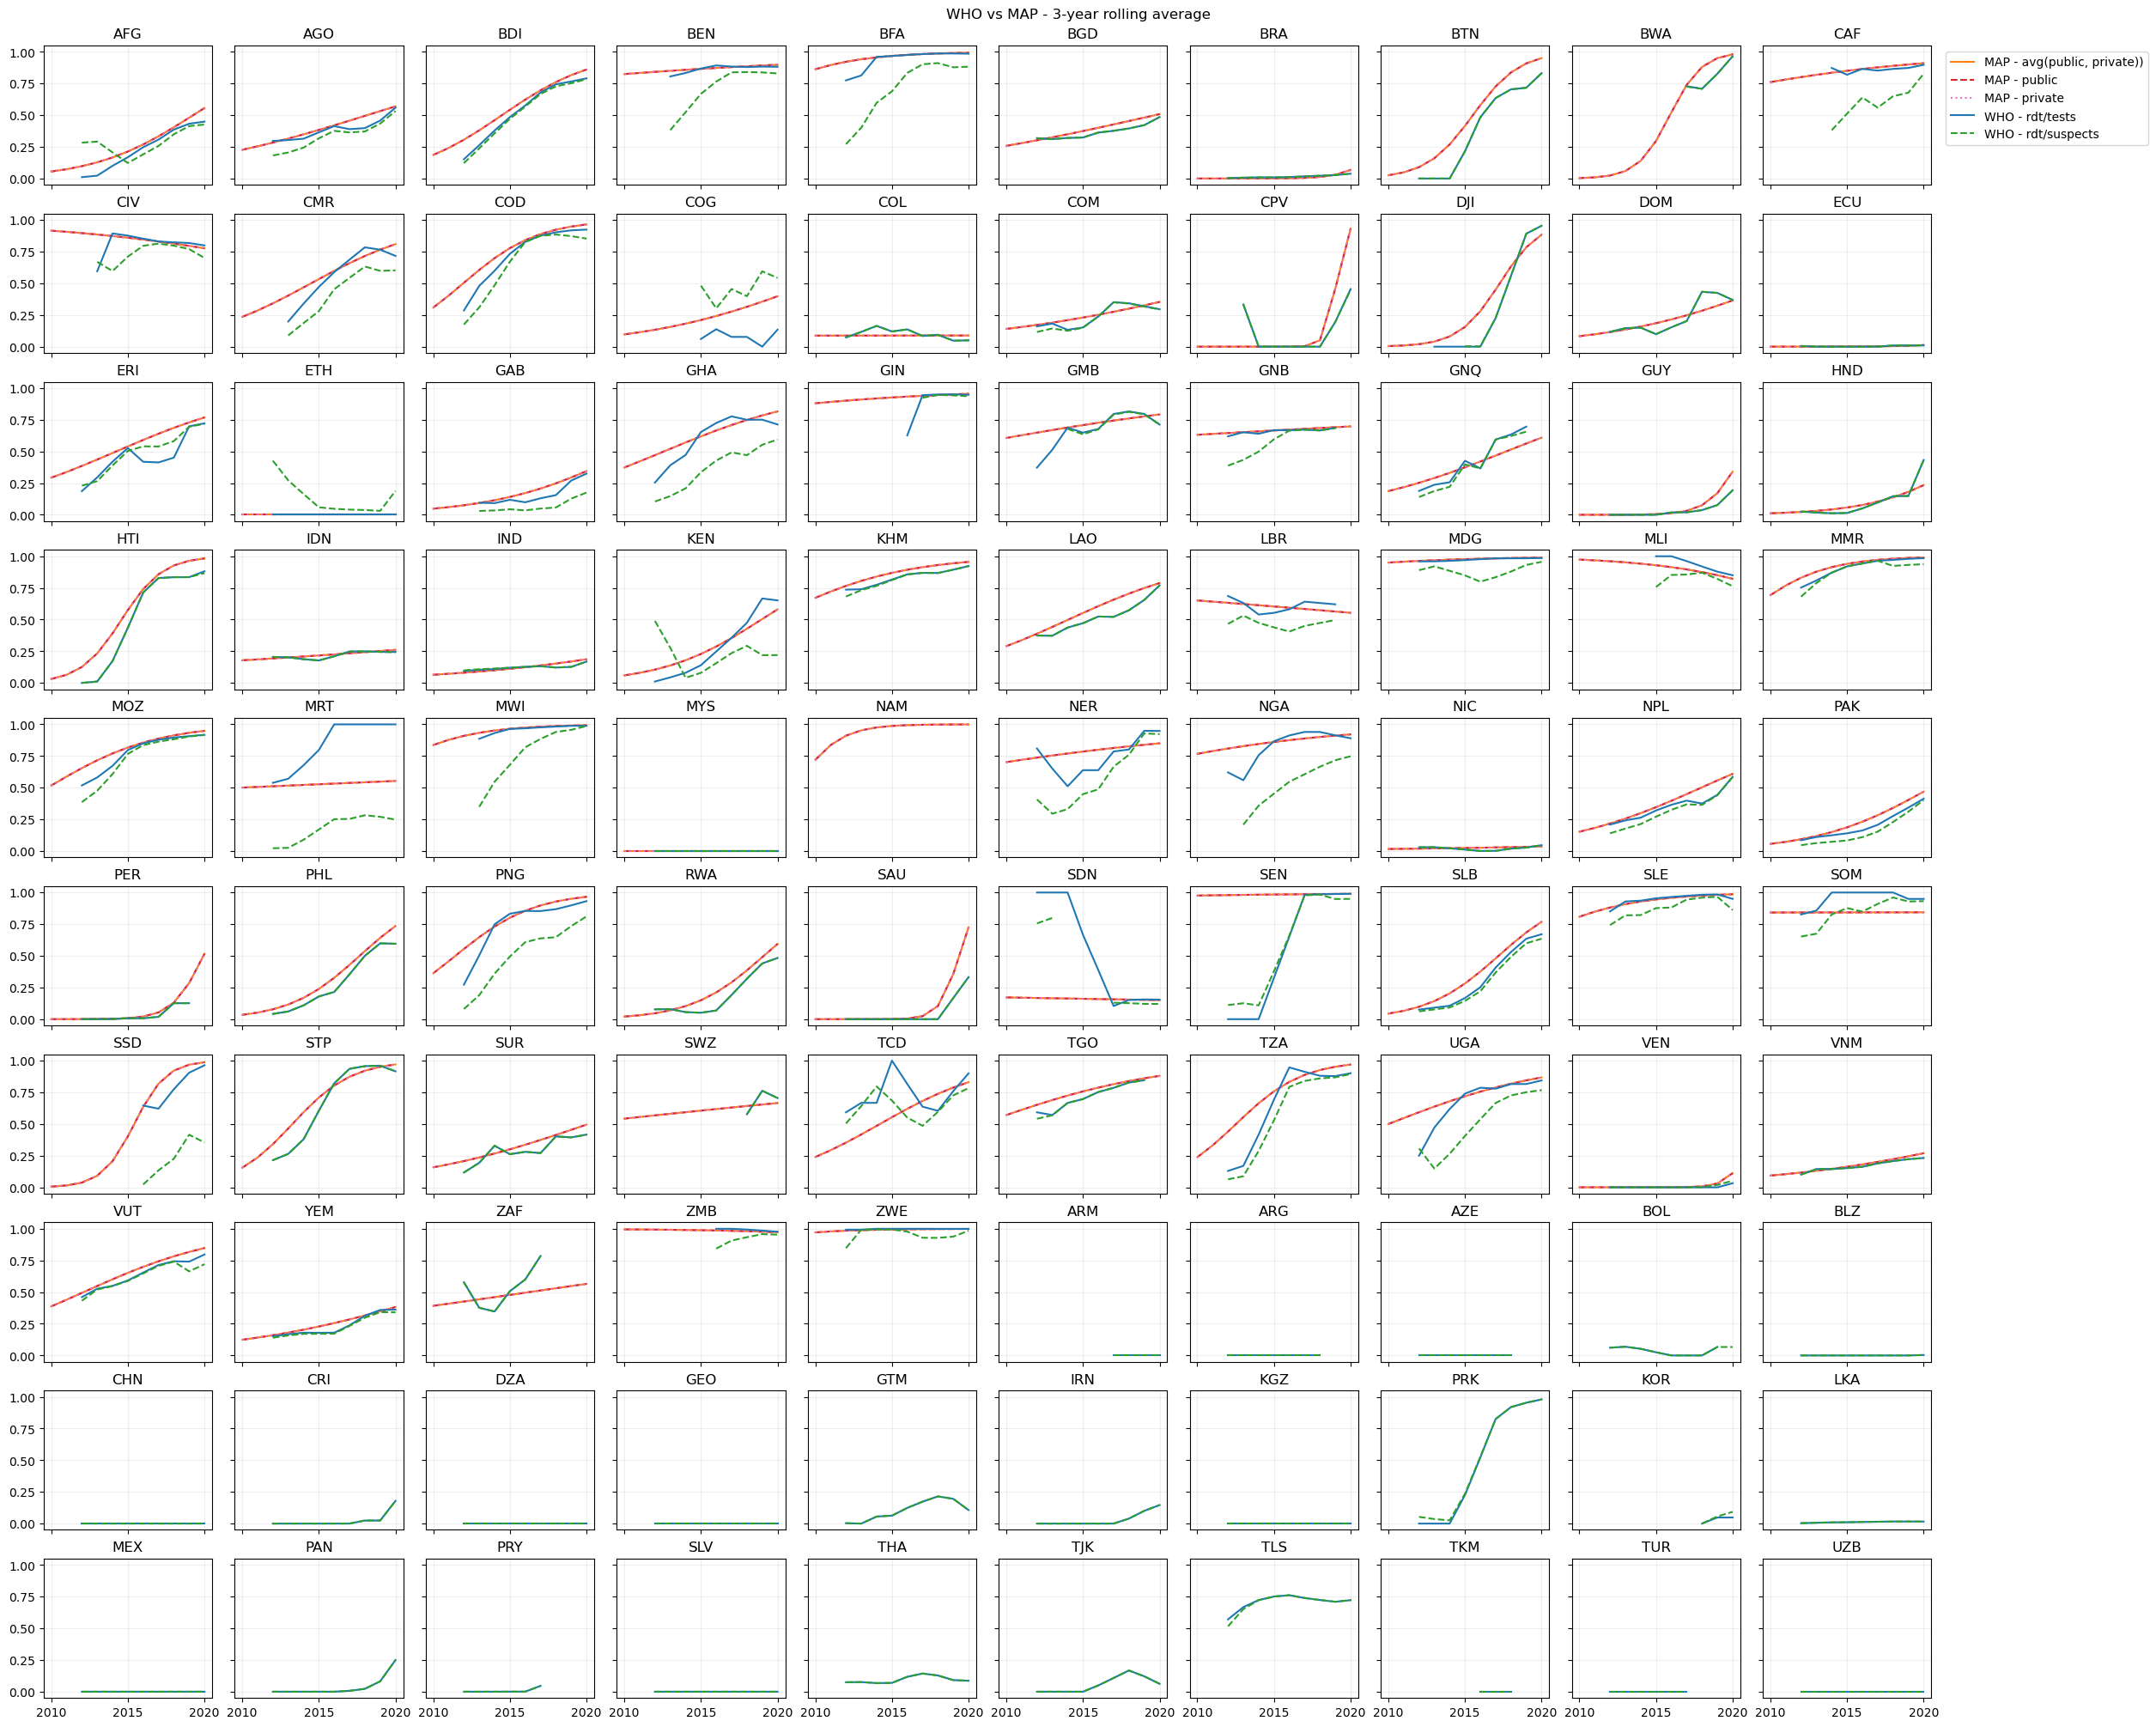

In [15]:
# check to see if who_df.frac_rdt_among_tests is the same as map_df.frac_rdt_total

# group by country (who_df.iso3, map_df.countryIso3)
# plot the two fractions against each other over years

# get the country code as the union of map_df.countryIso3 and who_df.iso3, unique values only
country_codes = pd.concat([map_df.countryIso3, who_df_3yr.iso3]).unique()

# create a figure with subplots for each country
# ncols = 10, nrows is determined by the number of countries
ncols = 10
nrows = int(np.ceil(len(country_codes) / ncols))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(25, 20), sharex=True, sharey=True, constrained_layout=True)

# loop over the country codes
for i, country_code in enumerate(country_codes):
    # get the axes for this country
    ax = axes.flat[i]
    # get the data for this country
    map_data = map_df[map_df.countryIso3 == country_code]
    who_data = who_df_3yr[who_df_3yr.iso3 == country_code]
    # plot the data
    ax.plot(map_data.year, map_data.frac_rdt_total, color='tab:orange', ls='-', label='MAP - avg(public, private))')
    ax.plot(map_data.year, map_data.frac_rdt_public, color='tab:red', ls='--', label='MAP - public')
    ax.plot(map_data.year, map_data.frac_rdt_private, color='tab:pink', ls=':', label='MAP - private')
    ax.plot(who_data.year, who_data.rdt_among_tests_nn, color='tab:blue', label='WHO - rdt/tests')
    ax.plot(who_data.year, who_data.rdt_among_suspects_nn, color='tab:green', ls='--', label='WHO - rdt/suspects')
    # set the title
    ax.set_title(country_code)
    # set the legend
    # ax.legend()
    ax.grid(alpha=0.2)

axes[0,-1].legend( bbox_to_anchor=(1.05, 1), loc='upper left')
fig.suptitle('WHO vs MAP - 3-year rolling average')

### Plot last 5 data points WHO and MAP side by side, sorted by increasing RDT in MAP data

In [50]:
# map_df with the last 5 years of data
# columns to keep: countryIso3, country, year, frac_rdt_total, frac_rdt_public, frac_rdt_private
# rename countryIso3 to iso3
map_df_last5 = map_df.groupby('countryIso3').tail(5).reset_index(drop=True)
map_df_last5 = map_df_last5[['countryIso3', 'country', 'year', 'frac_rdt_total']] #, 'frac_rdt_public', 'frac_rdt_private']]
map_df_last5 = map_df_last5.rename(columns={'countryIso3': 'iso3'})
map_df_last5.head()

,iso3,country,year,frac_rdt_total
0,AFG,Afghanistan,2016,0.268799
1,AFG,Afghanistan,2017,0.333158
2,AFG,Afghanistan,2018,0.404403
3,AFG,Afghanistan,2019,0.479919
4,AFG,Afghanistan,2020,0.556364


In [51]:
# who_df_3yr with the last 5 years of data
# columns to keep: iso3, country, year, rdt_among_tests_nn, rdt_among_suspects_nn
who_df_3yr_last5 = who_df_3yr.groupby('iso3').tail(3).reset_index(drop=True)
who_df_3yr_last5 = who_df_3yr_last5[['iso3', 'country', 'year', 'rdt_among_tests_nn', 'rdt_among_suspects_nn']]
who_df_3yr_last5.head()

,iso3,country,year,rdt_among_tests_nn,rdt_among_suspects_nn
0,AFG,Afghanistan,2018,0.386179,0.349283
1,AFG,Afghanistan,2019,0.432350,0.414035
2,AFG,Afghanistan,2020,0.449348,0.426170
3,ARM,Armenia,2017,0.000000,0.000000
4,ARM,Armenia,2018,0.000000,0.000000


In [52]:
# merge the two dataframes on countryIso3, iso3, country, year
# drop country_x (from map_df_last3)
# rename country_y to country
# drop countryIso3 (from map_df_last3)

last5_df = pd.merge(map_df_last5, who_df_3yr_last5, left_on=['iso3', 'year'], right_on=['iso3', 'year'], how='outer')
last5_df = last5_df.drop(columns=['country_y'])
last5_df = last5_df.rename(columns={'country_x': 'country'})
last5_df.head()

,iso3,country,year,frac_rdt_total,rdt_among_tests_nn,rdt_among_suspects_nn
0,AFG,Afghanistan,2016,0.268799,NaN,NaN
1,AFG,Afghanistan,2017,0.333158,NaN,NaN
2,AFG,Afghanistan,2018,0.404403,0.386179,0.349283
3,AFG,Afghanistan,2019,0.479919,0.432350,0.414035
4,AFG,Afghanistan,2020,0.556364,0.449348,0.426170


In [19]:
# unique countries in last5_df
last5_df.iso3.unique().size

100

In [20]:
(last5_df.year == 2020).sum()

97

In [21]:
# which year has the most countries?
last5_df.groupby('year').iso3.nunique()

year
2015     1
2016    77
2017    79
2018    99
2019    97
2020    97
Name: iso3, dtype: int64

In [53]:
# which country in last5_df.iso3.unique() but did not show up iin 2018
# set(last5_df.iso3.unique()) - set(last5_df[last5_df.year == 2018].iso3.unique())

# which country in last5_df.iso3.unique() but did not show up iin 2020
set(last5_df.iso3.unique()) - set(last5_df[last5_df.year == 2020].iso3.unique())

{'AZE', 'TKM', 'TUR'}

In [54]:
# filter rows of TUR, TKM, AZE
last5_df[(last5_df.iso3 == 'TUR') | (last5_df.iso3 == 'TKM') | (last5_df.iso3 == 'AZE')]

,iso3,country,year,frac_rdt_total,rdt_among_tests_nn,rdt_among_suspects_nn
381,AZE,NaN,2017,NaN,0.0,0.0
382,AZE,NaN,2018,NaN,0.0,0.0
383,AZE,NaN,2019,NaN,NaN,NaN
441,TKM,NaN,2016,NaN,0.0,0.0
442,TKM,NaN,2017,NaN,0.0,0.0
443,TKM,NaN,2018,NaN,0.0,0.0
444,TUR,NaN,2015,NaN,0.0,0.0
445,TUR,NaN,2016,NaN,0.0,0.0
446,TUR,NaN,2017,NaN,0.0,0.0


In [55]:
# get iso3 sorted by descending frac_rdt_total in 2020
iso3_sorted = last5_df[last5_df.year == 2020].sort_values('frac_rdt_total', ascending=False).iso3.reset_index(drop=True)
# add 'TUR', 'TKM', 'AZE', to the end of iso3_sorted (RDT = 0 from 2015 to 2019, assuming stay at 0 in MAP data)
iso3_sorted = pd.concat([iso3_sorted, pd.Series(['AZE','TKM','TUR'])], axis=0).reset_index(drop=True)
iso3_sorted

0     NAM
1     ZWE
2     MWI
3     BFA
4     MMR
     ... 
95    TLS
96    UZB
97    AZE
98    TKM
99    TUR
Length: 100, dtype: object

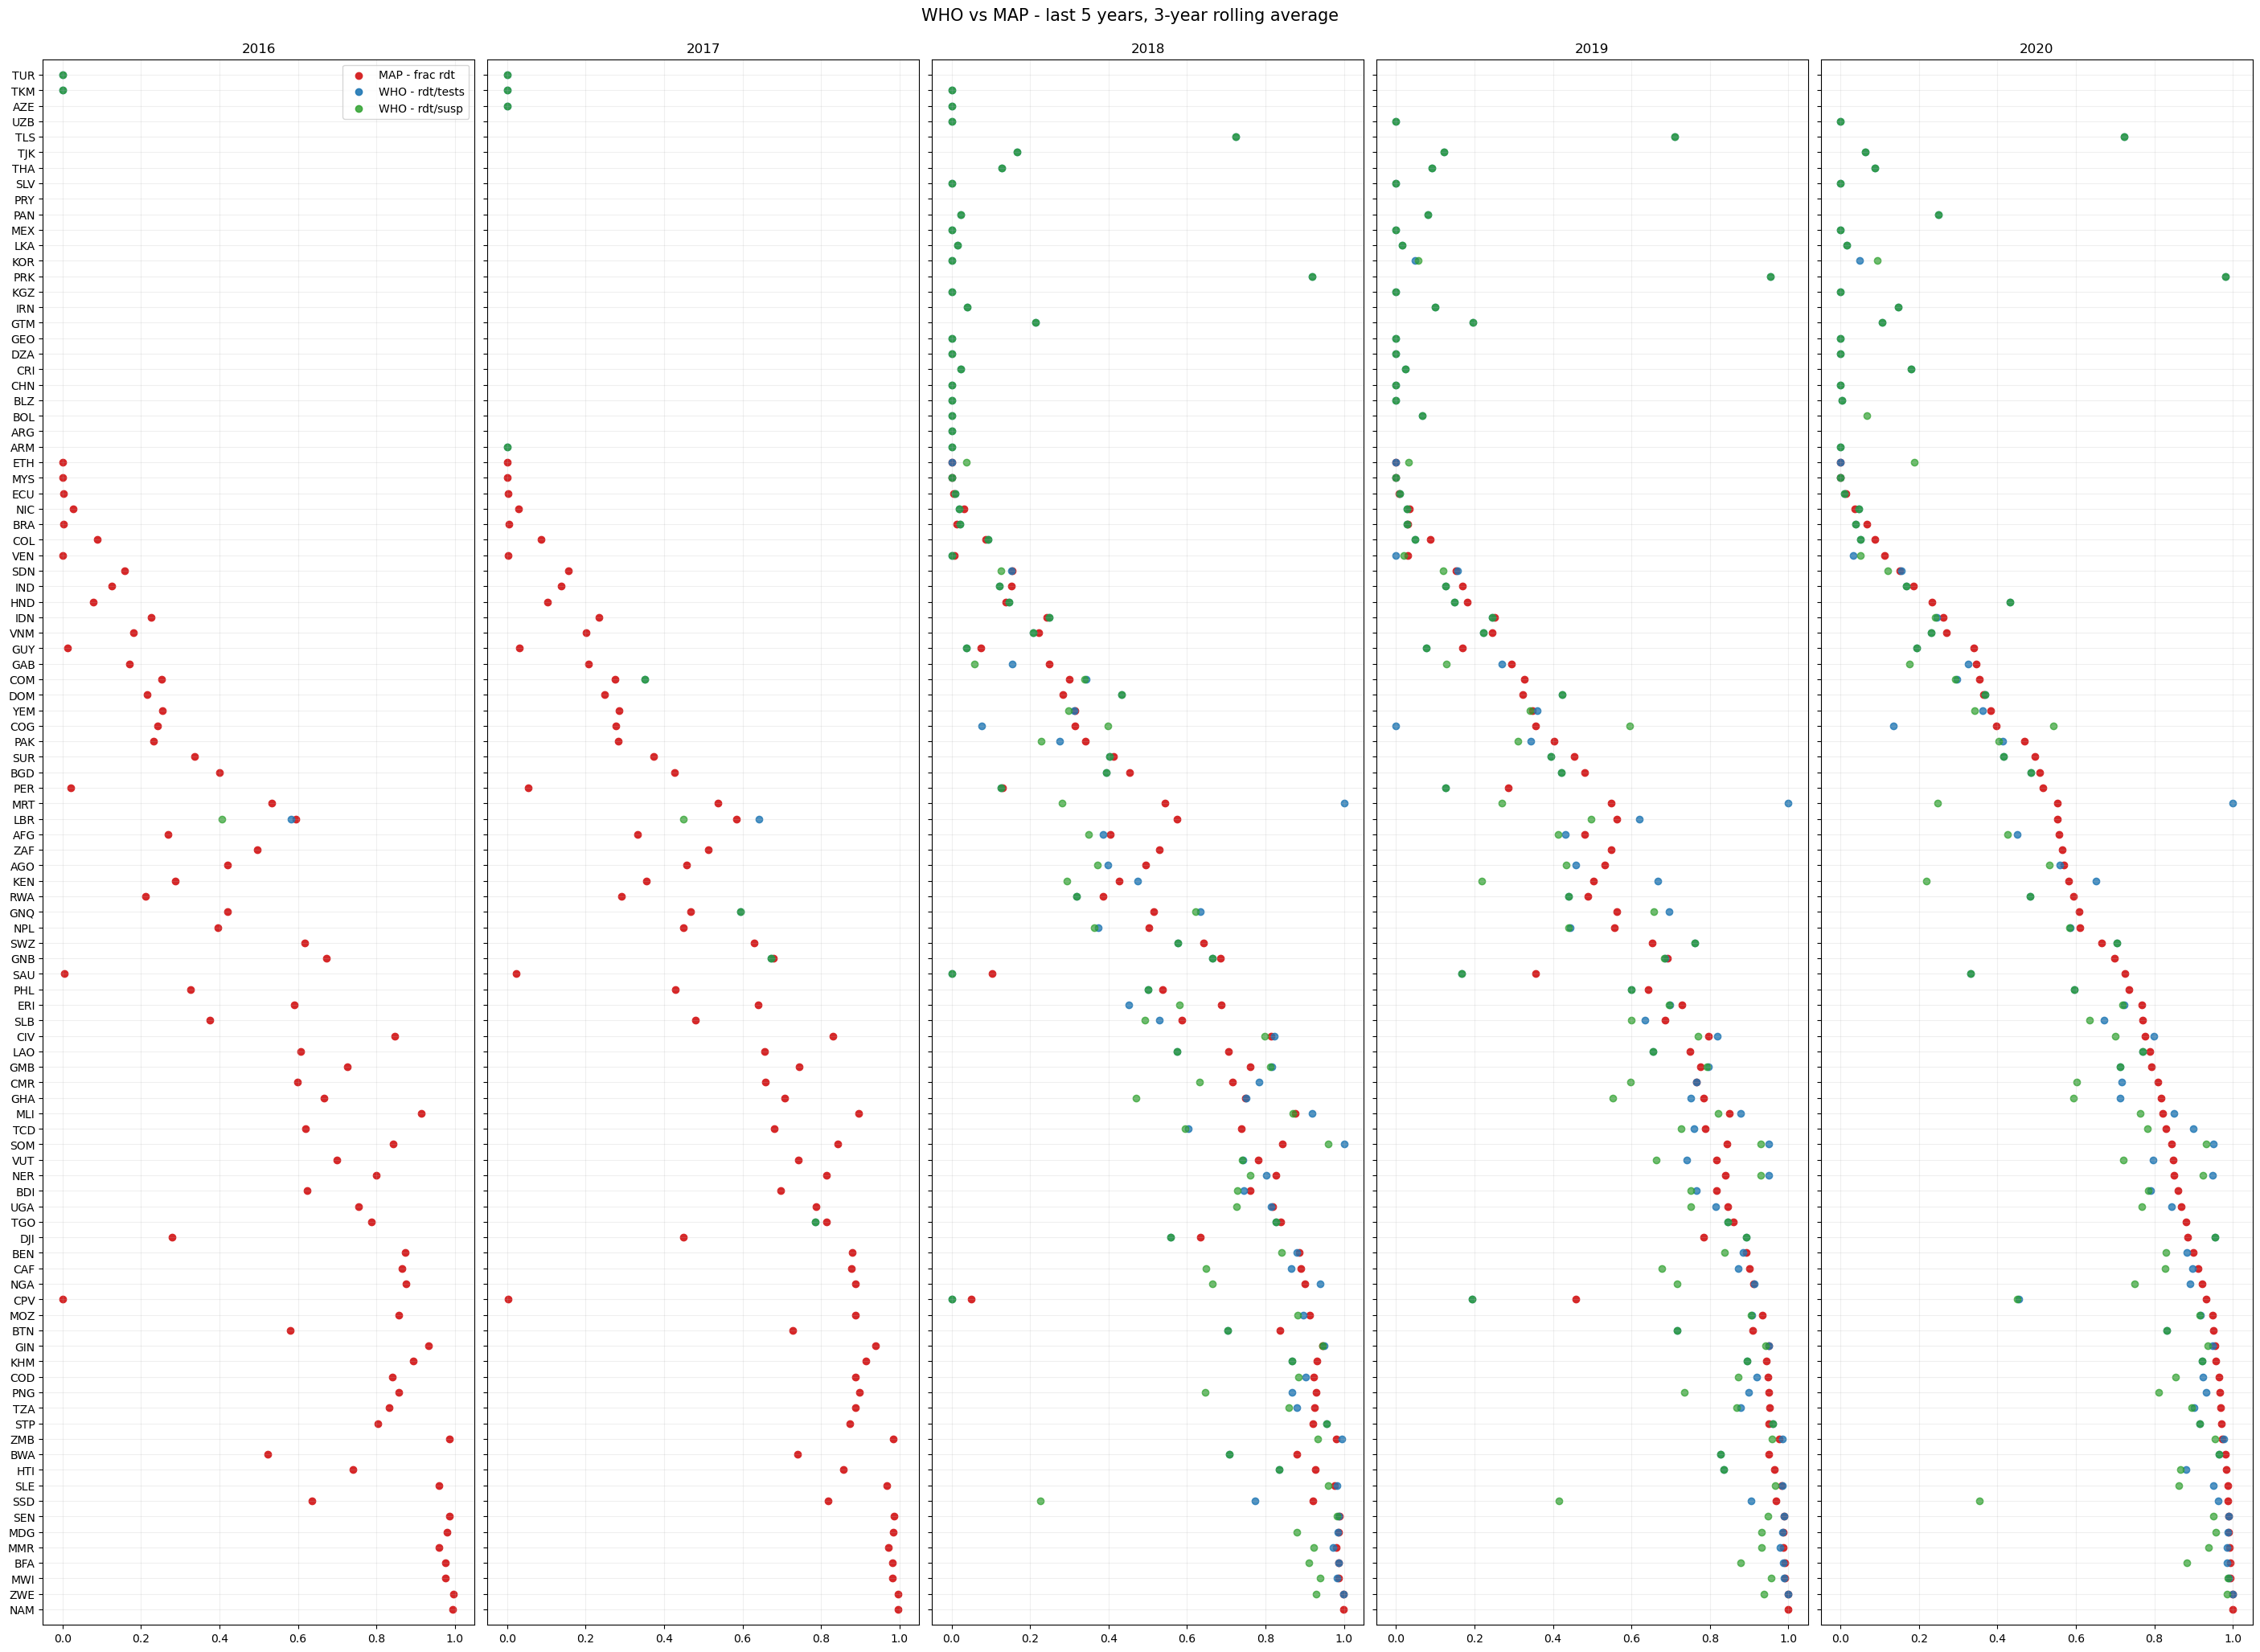

In [56]:
# iso3_sorted is the order of countries in the plot
# create a figure with subplots for each year
# ncols = 5, nrows = 1
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(28, 20), sharex=True, sharey=True, constrained_layout=True)

# each subplot is a year
# y-axis is the country with the order following iso3_sorted
# x-axis is scatter dots for frac_rdt_total in red (MAP) and rdt_among_tests_nn in blue (WHO)
# x-axis is the same for all subplots

first_label = True
# loop over the years from 2016 to 2020
for i, year in enumerate(range(2016, 2021)):
    # get the axes for this year
    ax = axes.flat[i]
    # get the data for this year
    data = last5_df[last5_df.year == year]

    # iterate over the countries in iso3_sorted
    for j, iso3 in enumerate(iso3_sorted):
        # get the data for this country
        data_ = data[data.iso3 == iso3]
        # if data_ is empty, skip this country
        if data_.empty:
            continue
        # plot the data
        if first_label:
            ax.scatter(data_.frac_rdt_total, j, color='tab:red', label='MAP - frac rdt')
            ax.scatter(data_.rdt_among_tests_nn, j, color='tab:blue', alpha=0.9, label='WHO - rdt/tests')
            ax.scatter(data_.rdt_among_suspects_nn, j, color='tab:green', alpha=0.84, label='WHO - rdt/susp')
            first_label = False
        else:
            ax.scatter(data_.frac_rdt_total, j, color='tab:red')
            ax.scatter(data_.rdt_among_tests_nn, j, color='tab:blue', alpha=0.8)
            ax.scatter(data_.rdt_among_suspects_nn, j, color='tab:green', alpha=0.7)
        # write a text at each y-axis tick
        # ax.text(0.3, j, iso3, ha='right', va='center', fontsize=8)
    
    # set the title
    ax.set_title(year)

axes[0].legend( )#bbox_to_anchor=(1.05, 1), loc='upper left')

for ax in axes:
    ax.set_ylim(-1, 100)
    ax.yaxis.set_major_locator(ticker.MultipleLocator(4))
    # ax.yaxis.set_minor_locator(ticker.MultipleLocator(2))
    
    # set y tick labels to iso3_sorted
    ax.set_yticks(range(len(iso3_sorted)))
    ax.set_yticklabels(iso3_sorted)

    ax.grid(which='both', alpha=0.2)



f_sup = fig.suptitle('WHO vs MAP - last 5 years, 3-year rolling average', fontsize=15, y=1.02)

# fig.tight_layout()

fig.savefig('last5_3yrravg.pdf', dpi=300, bbox_inches='tight', bbox_extra_artists=[f_sup])

In [ ]:
last5_df[(last5_df.year > 2017) & (last5_df.rdt_among_tests_nn < 0.1)]